## Descripción del proyecto

Este proyecto formativo fue desarrollado únicamente con fines educativos y se basa en los datos publicados por Barth et al. (2024).

El conjunto de datos utilizado corresponde a un ensayo de alimentación controlado y aleatorio cuyo propósito fue evaluar si las larvas de Hermetia illucens (mosca soldado negra, MSN), criadas sobre subproductos vegetales ampliamente disponibles pero poco aprovechados —como cáscaras de cacao, pulpa de manzana despectinizada y cáscaras de papa—, podrían utilizarse como fuente sostenible de alimento en la acuicultura del camarón blanco del Pacífico (Penaeus vannamei, PWS).

Los datos brutos (raw data) incluyen información sobre los regímenes de alimentación, las características de crecimiento y los parámetros de conversión alimenticia del camarón blanco del Pacífico alimentado con dietas basadas en larvas de mosca soldado negra (BSF), donde dichas larvas fueron criadas en cáscaras de cacao, orujo de manzana despectinizado, cáscaras de papa y un alimento control a base de granos.

Referencia bibliográfica

- Barth, A., Wilke, T., & Justus Liebig University Giessen. (2024). Raw data for shrimp feeding study based on insects reared on plant by-products [Dataset]. Justus-Liebig-Universität Gießen. https://doi.org/10.22029/JLUPUB-19060


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio

In [16]:
data = pd.read_excel(r'C:\Users\HP\Desktop\Machine learning biociencias\experimento_camaron.xlsx')
data.head()

,Tank,Treatment,Day,Total BSF (g) FM,Total BSF (g) DM,Total pellets (g) FM,Total pellets (g) DM,Total feed (g) FM,Total feed (g) DM,Initial weight (IW) g,Final weight (FW) g,Weight gain (WG) %,Specific growth rate (SGR) %,Feed conversion ratio (FCR),Efficiency of conversion of the ingested feed (ECI),Intitial Size cm,Final Size cm,Survival rate %,Time of death (day)
0,A1-4l,Cocoa bean shells,35,"2,47","0,45","0,39","0,39","2,86","0,84","0,11","1,44",1252.0,"7,44","0,63","1,58","2,12","5,89",100,35
1,A1-4r,Cocoa bean shells,35,"2,47","0,45","0,39","0,39","2,86","0,84","0,11","1,21",1036.0,"6,94","0,77","1,31","1,97","6,04",100,35
2,B1-1l,Cocoa bean shells,35,"2,47","0,45","0,39","0,39","2,86","0,84","0,11","1,81",1600.0,"8,09","0,50","2,02","2,55","6,38",100,35
3,B1-1r,Cocoa bean shells,35,"2,47","0,45","0,39","0,39","2,86","0,84","0,11","1,46",1271.0,"7,48","0,62","1,60","2,76","5,98",100,35
4,B1-5l,Cocoa bean shells,35,"2,47","0,45","0,39","0,39","2,86","0,84","0,11","1,14",970.0,"6,77","0,82","1,22","2,05","5,86",100,35


In [17]:
data.columns

Index(['Tank', 'Treatment', 'Day', 'Total BSF (g) FM', 'Total BSF (g) DM',
       'Total pellets (g) FM', 'Total pellets (g) DM', 'Total feed (g) FM',
       'Total feed (g) DM', 'Initial weight (IW) g', 'Final weight (FW) g',
       'Weight gain (WG) %', 'Specific growth rate (SGR) %',
       'Feed conversion ratio (FCR)',
       'Efficiency of conversion of the ingested feed (ECI)',
       'Intitial Size cm ', 'Final Size cm ', 'Survival rate %',
       'Time of death (day)'],
      dtype='object')

In [18]:
data.describe()

,Day,Weight gain (WG) %,Survival rate %,Time of death (day)
count,112.0,110.000000,112.000000,112.000000
mean,35.0,1194.300000,98.214286,34.607143
std,0.0,277.635282,13.302732,3.219751
min,35.0,266.000000,0.000000,3.000000
25%,35.0,1008.000000,100.000000,35.000000
50%,35.0,1191.000000,100.000000,35.000000
75%,35.0,1365.000000,100.000000,35.000000
max,35.0,1928.000000,100.000000,35.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Tank                                                 112 non-null    object 
 1   Treatment                                            112 non-null    object 
 2   Day                                                  112 non-null    int64  
 3   Total BSF (g) FM                                     112 non-null    object 
 4   Total BSF (g) DM                                     112 non-null    object 
 5   Total pellets (g) FM                                 112 non-null    object 
 6   Total pellets (g) DM                                 112 non-null    object 
 7   Total feed (g) FM                                    112 non-null    object 
 8   Total feed (g) DM                                    112 non-null    o

In [20]:
data.columns = data.columns.str.strip().str.replace(" ", "_")


In [21]:
data.columns= data.columns.str.replace('_(g)_', '_')
data.columns

Index(['Tank', 'Treatment', 'Day', 'Total_BSF_FM', 'Total_BSF_DM',
       'Total_pellets_FM', 'Total_pellets_DM', 'Total_feed_FM',
       'Total_feed_DM', 'Initial_weight_(IW)_g', 'Final_weight_(FW)_g',
       'Weight_gain_(WG)_%', 'Specific_growth_rate_(SGR)_%',
       'Feed_conversion_ratio_(FCR)',
       'Efficiency_of_conversion_of_the_ingested_feed_(ECI)',
       'Intitial_Size_cm', 'Final_Size_cm', 'Survival_rate_%',
       'Time_of_death_(day)'],
      dtype='object')

In [22]:
data.nunique()

Tank                                                   112
Treatment                                                4
Day                                                      1
Total_BSF_FM                                             4
Total_BSF_DM                                             4
Total_pellets_FM                                         1
Total_pellets_DM                                         1
Total_feed_FM                                            4
Total_feed_DM                                            4
Initial_weight_(IW)_g                                    1
Final_weight_(FW)_g                                     73
Weight_gain_(WG)_%                                      73
Specific_growth_rate_(SGR)_%                            73
Feed_conversion_ratio_(FCR)                             70
Efficiency_of_conversion_of_the_ingested_feed_(ECI)     76
Intitial_Size_cm                                        87
Final_Size_cm                                           

In [23]:
data['Initial_weight_(IW)_g'].nunique()

1

In [24]:
data = data.drop(['Day', 'Tank', 'Initial_weight_(IW)_g', 'Final_weight_(FW)_g', 'Total_pellets_FM', 'Total_pellets_DM'], axis=1)

In [25]:
columnas_numericas = ['Total_BSF_FM', 'Total_BSF_DM', 'Specific_growth_rate_(SGR)_%', 
       'Total_feed_FM', 
       'Total_feed_DM',
       'Feed_conversion_ratio_(FCR)',
       'Efficiency_of_conversion_of_the_ingested_feed_(ECI)',
       'Intitial_Size_cm', 'Final_Size_cm']
for col in columnas_numericas:
    data[col] = data[col].str.replace(',', '.').astype(float)

Se eliminaron filas que no aportaban información como Day, Initial weight (IW) g, Total pellets (g) FM, Total pellets (g) DM que no cambia entre tratamientos, Tank que es mas bien un clasificador y variables redundantes como Final weight (FW) g, ya que ya contamos con una variables mas que nos da mas información sobre el crecimiento como Weight gain (WG) % que nos da el porcentaje de ganancia de peso

In [26]:
data_filtrado = data.dropna()
data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Treatment                                            110 non-null    object 
 1   Total_BSF_FM                                         110 non-null    float64
 2   Total_BSF_DM                                         110 non-null    float64
 3   Total_feed_FM                                        110 non-null    float64
 4   Total_feed_DM                                        110 non-null    float64
 5   Weight_gain_(WG)_%                                   110 non-null    float64
 6   Specific_growth_rate_(SGR)_%                         110 non-null    float64
 7   Feed_conversion_ratio_(FCR)                          110 non-null    float64
 8   Efficiency_of_conversion_of_the_ingested_feed_(ECI)  110 non-null    float6

se eliminaron los datos ausentes asociados a una supervivencia 0, debido a que sin información extra no es posible saber si la muerte total de estos tanques se debe al tratamiento o a factores externos ajenos al experimento, como una contaminación del tanque o fallos en los sistemas de airación 

In [27]:
data.head()

,Treatment,Total_BSF_FM,Total_BSF_DM,Total_feed_FM,Total_feed_DM,Weight_gain_(WG)_%,Specific_growth_rate_(SGR)_%,Feed_conversion_ratio_(FCR),Efficiency_of_conversion_of_the_ingested_feed_(ECI),Intitial_Size_cm,Final_Size_cm,Survival_rate_%,Time_of_death_(day)
0,Cocoa bean shells,2.47,0.45,2.86,0.84,1252.0,7.44,0.63,1.58,2.12,5.89,100,35
1,Cocoa bean shells,2.47,0.45,2.86,0.84,1036.0,6.94,0.77,1.31,1.97,6.04,100,35
2,Cocoa bean shells,2.47,0.45,2.86,0.84,1600.0,8.09,0.50,2.02,2.55,6.38,100,35
3,Cocoa bean shells,2.47,0.45,2.86,0.84,1271.0,7.48,0.62,1.60,2.76,5.98,100,35
4,Cocoa bean shells,2.47,0.45,2.86,0.84,970.0,6.77,0.82,1.22,2.05,5.86,100,35


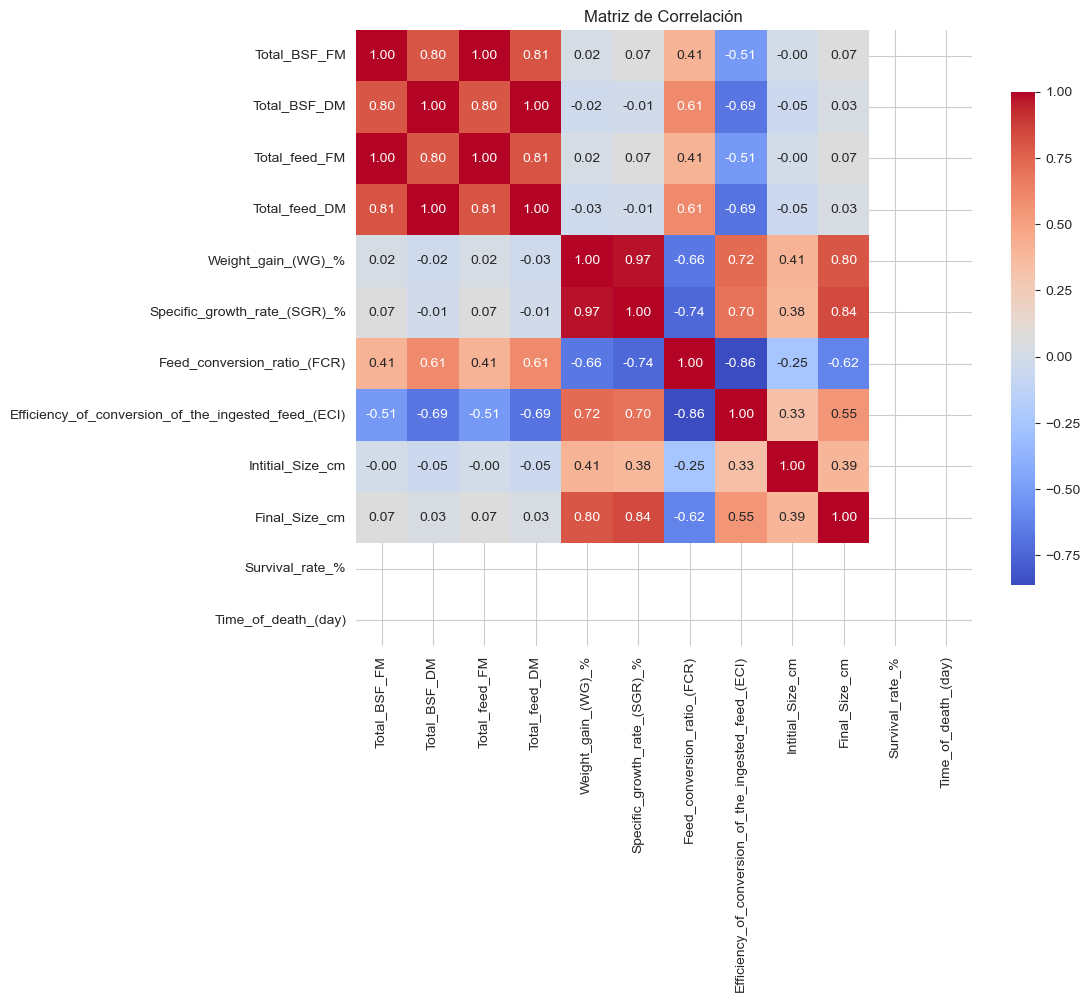

In [28]:
correlacion = data_filtrado.drop('Treatment', axis=1).corr()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

In [31]:
data_filtrado.columns

Index(['Treatment', 'Total_BSF_FM', 'Total_BSF_DM', 'Total_feed_FM',
       'Total_feed_DM', 'Weight_gain_(WG)_%', 'Specific_growth_rate_(SGR)_%',
       'Feed_conversion_ratio_(FCR)',
       'Efficiency_of_conversion_of_the_ingested_feed_(ECI)',
       'Intitial_Size_cm', 'Final_Size_cm', 'Survival_rate_%',
       'Time_of_death_(day)'],
      dtype='object')

In [33]:
data_filtrado = data_filtrado.drop(['Survival_rate_%',
       'Time_of_death_(day)'], axis=1)

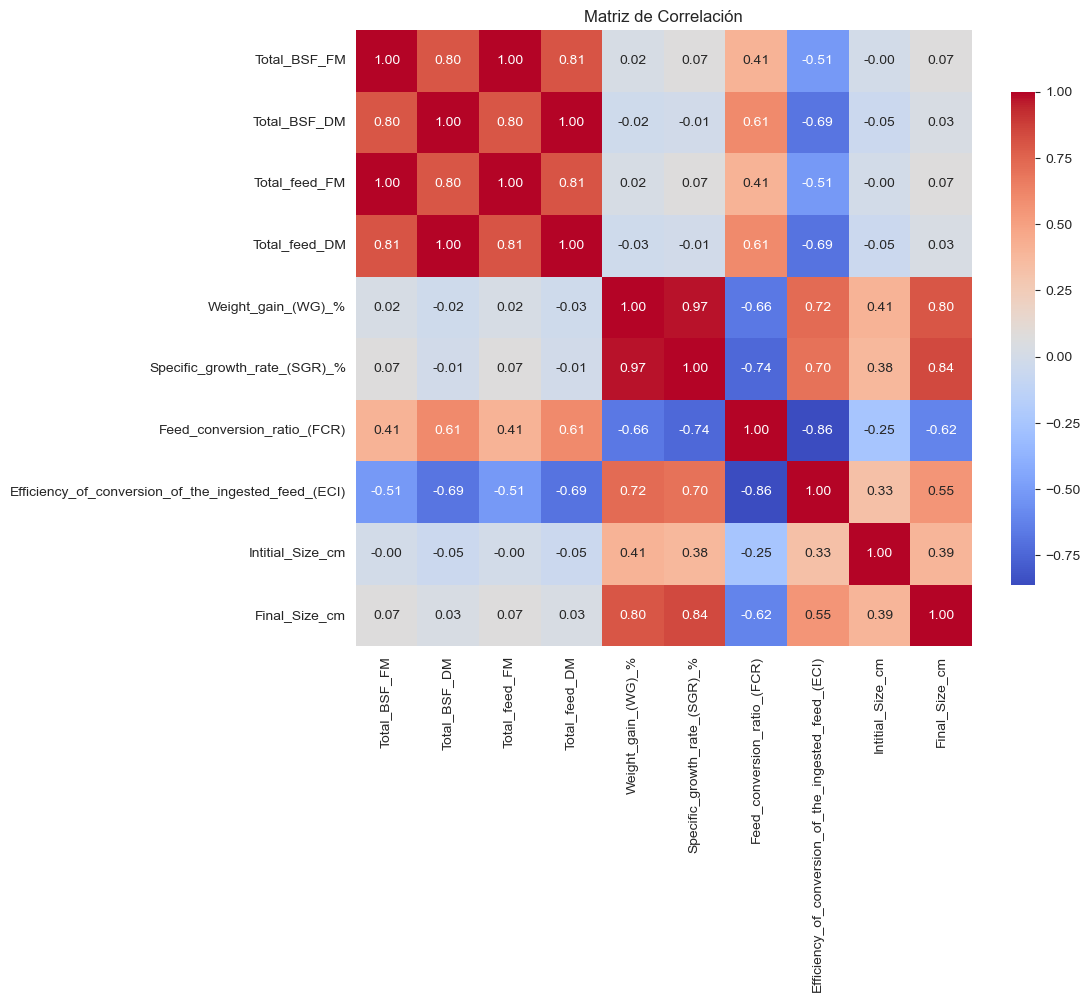

In [34]:
correlacion_f = data_filtrado.drop('Treatment', axis=1).corr()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_f, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

In [35]:
data_filtrado.head()

,Treatment,Total_BSF_FM,Total_BSF_DM,Total_feed_FM,Total_feed_DM,Weight_gain_(WG)_%,Specific_growth_rate_(SGR)_%,Feed_conversion_ratio_(FCR),Efficiency_of_conversion_of_the_ingested_feed_(ECI),Intitial_Size_cm,Final_Size_cm
0,Cocoa bean shells,2.47,0.45,2.86,0.84,1252.0,7.44,0.63,1.58,2.12,5.89
1,Cocoa bean shells,2.47,0.45,2.86,0.84,1036.0,6.94,0.77,1.31,1.97,6.04
2,Cocoa bean shells,2.47,0.45,2.86,0.84,1600.0,8.09,0.50,2.02,2.55,6.38
3,Cocoa bean shells,2.47,0.45,2.86,0.84,1271.0,7.48,0.62,1.60,2.76,5.98
4,Cocoa bean shells,2.47,0.45,2.86,0.84,970.0,6.77,0.82,1.22,2.05,5.86


Dentro de los datos se encuentran numerosas variables de respuesta o variables dependientes como: 
- Weight_gain_WG
- Feed conversion ratio (FCR)
- Efficiency of conversion of the ingested feed (ECI)
- Final Size cm
- Survival rate %
- Time of death (day) 

Al no ser variables que se puedan manipular o cambiar para observar su efecto, solo se tomara una de ella como variable 'Y' para la creacion de un modelo de machine learning y no se incluiran el resto como caracteristicas 'X'. Sin embargo, pueden crearse varios modelos de machine learning para predecir estas variables dependientes.

In [36]:
data_filtrado = data_filtrado.rename(columns={'Feed_conversion_ratio_(FCR)': 'FCR', 'Efficiency_of_conversion_of_the_ingested_feed_(ECI)': 'ECI', 'Specific_growth_rate_(SGR)_%': 'SGR'})

In [37]:
variables_respuesta =['Weight_gain_(WG)_%', 'FCR', 'ECI', 'Final_Size_cm']


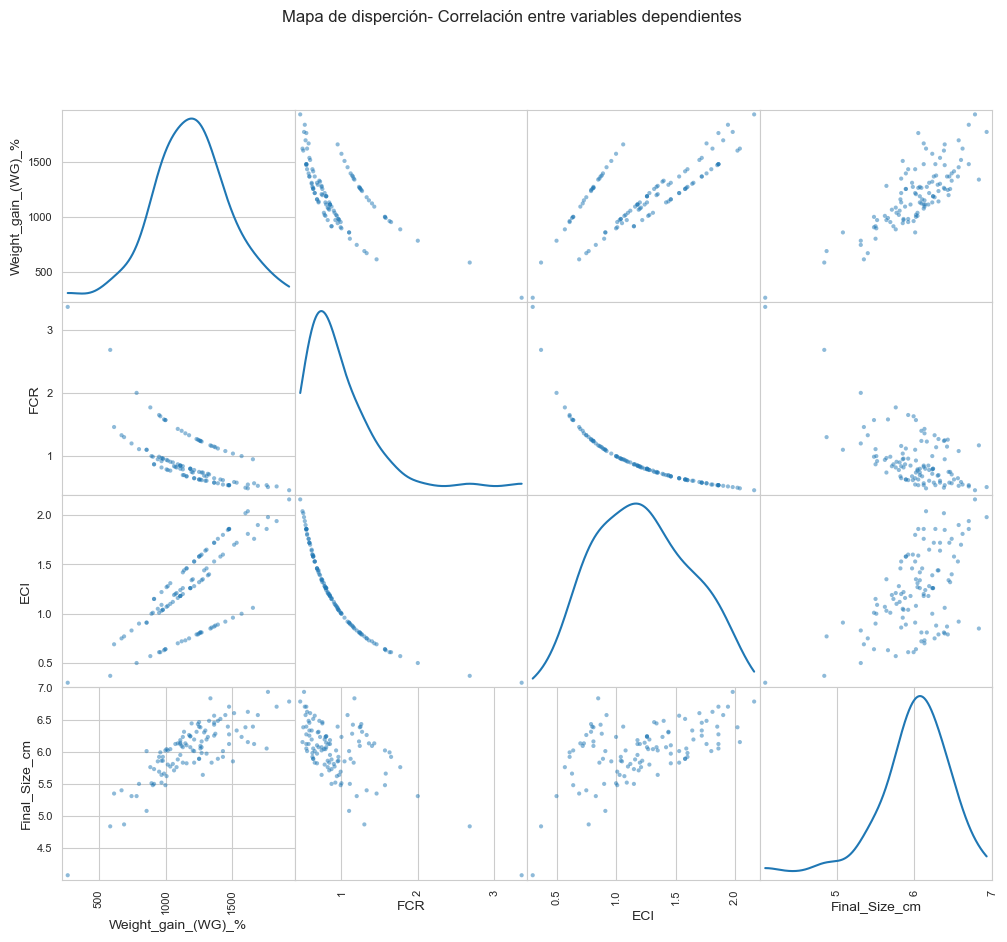

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_filtrado[variables_respuesta], figsize=(12, 10), diagonal='kde')  # diag_kind='hist' para histogramas
plt.suptitle('Mapa de disperción- Correlación entre variables dependientes')
plt.show()

In [39]:
data_filtrado.columns

Index(['Treatment', 'Total_BSF_FM', 'Total_BSF_DM', 'Total_feed_FM',
       'Total_feed_DM', 'Weight_gain_(WG)_%', 'SGR', 'FCR', 'ECI',
       'Intitial_Size_cm', 'Final_Size_cm'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_17856\638077921.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
C:\Users\HP\AppData\Local\Temp\ipykernel_17856\638077921.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2,1].set_xticklabels(axs[2,1].get_xticklabels(), rotation=45, ha='right')


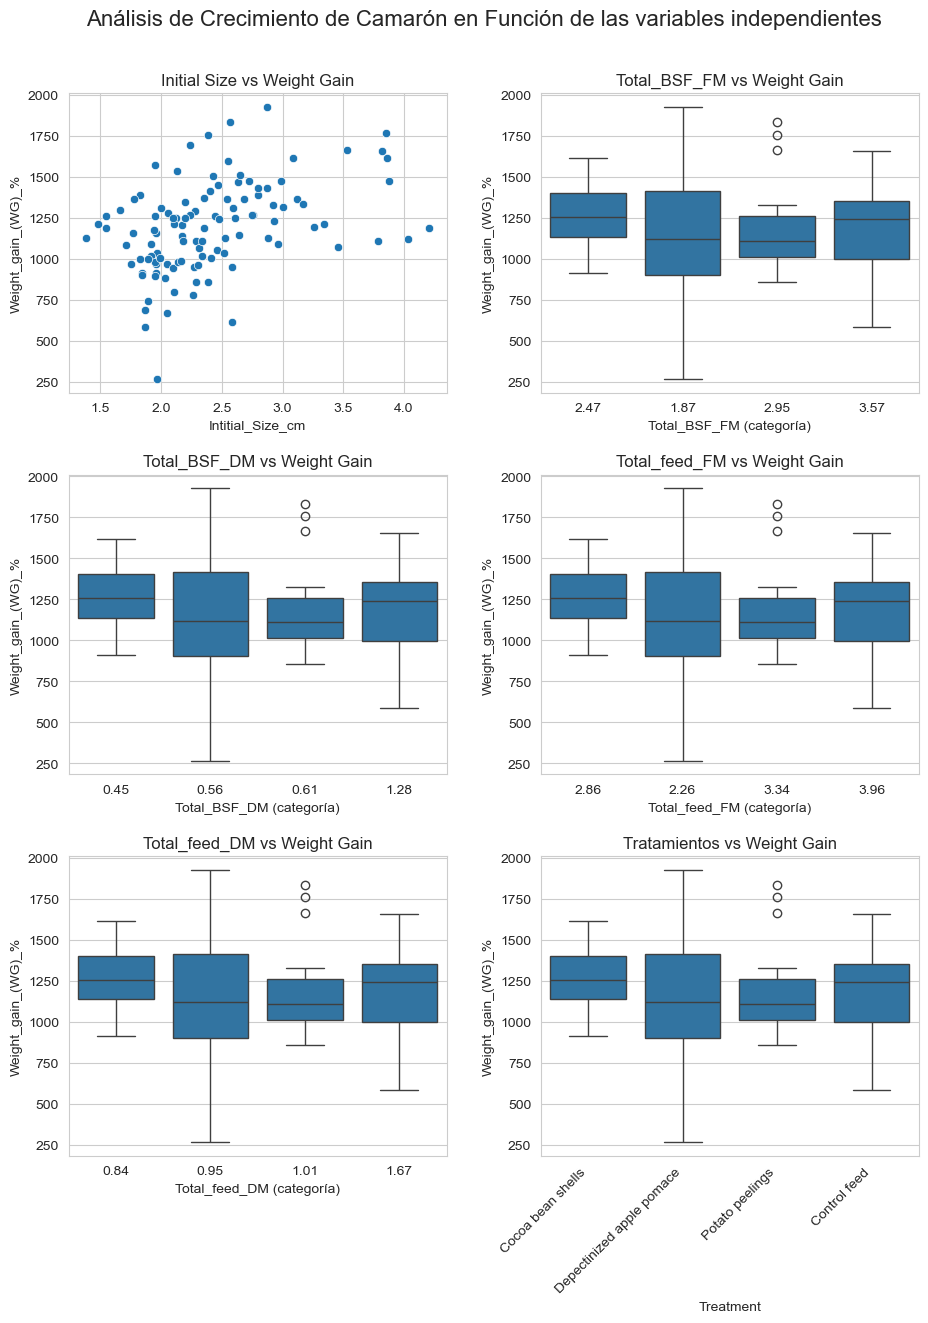

In [41]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True)
plt.tight_layout(pad=4.0)

# Variable continua: scatter
sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='Weight_gain_(WG)_%', ax=axs[0, 0])
axs[0, 0].set_title('Initial Size vs Weight Gain')

# Variables discretas: convertirlas a categorías
for col, ax in zip(['Total_BSF_FM', 'Total_BSF_DM', 'Total_feed_FM', 'Total_feed_DM'], [axs[0,1], axs[1,0], axs[1,1], axs[2,0]]):
    sns.boxplot(x=data_filtrado[col].astype(str), y=data_filtrado['Weight_gain_(WG)_%'], ax=ax)
    ax.set_title(f'{col} vs Weight Gain')
    ax.set_xlabel(col + ' (categoría)')

sns.boxplot(x=data_filtrado['Treatment'], y=data_filtrado['Weight_gain_(WG)_%'], ax=axs[2,1])
axs[2,1].set_title('Tratamientos vs Weight Gain')
axs[2,1].set_xticklabels(axs[2,1].get_xticklabels(), rotation=45, ha='right')

# Si queda un subplot vacío

fig.suptitle('Análisis de Crecimiento de Camarón en Función de las variables independientes',
             fontsize=16, y=1.02)
plt.show()

Debido a la correlación perfecta (r = 1) entre los pares de variables independientes:

- Total_BSF_FM y Total_feed_FM
- Total_feed_DM y Total_BSF_DM

se genera redundancia al incluir ambas variables de cada par en el modelo. Por otro lado, entre Total_BSF_FM y Total_feed_DM la correlación es alta pero no perfecta (r ≈ 0.8), lo que indica que comparten tendencia pero no son linealmente equivalentes.

La variable Treatment también muestra un patrón similar a Total_BSF_FM y Total_feed_DM, ya que tras analizar visualmente los datos se observó que corresponde a combinaciones discretas de estas cuatro variables; solo se presentan cuatro combinaciones distintas, lo que introduce redundancia adicional.

Aunque los pares perfectamente correlacionados muestran el mismo patrón en los diagramas de cajas, esta combinación limitada de valores podría afectar la construcción del modelo al reducir la diversidad de los datos.

Por ello, se seleccionarán solo Total_BSF_FM y Total_feed_DM para los análisis posteriores. Se construirán dos modelos: uno que incluya las variables dummies derivadas de Treatment y otro que no, con el fin de evaluar el impacto de la información redundante en la predicción

In [42]:
variables_independientes = ['Total_BSF_FM', 'Total_BSF_DM', 'Total_feed_FM', 'Total_feed_DM', 'Intitial_Size_cm']
variables_dummies_independientes = ['Treatment_Control feed', 'Treatment_Depectinized apple pomace', 'Treatment_Potato peelings']

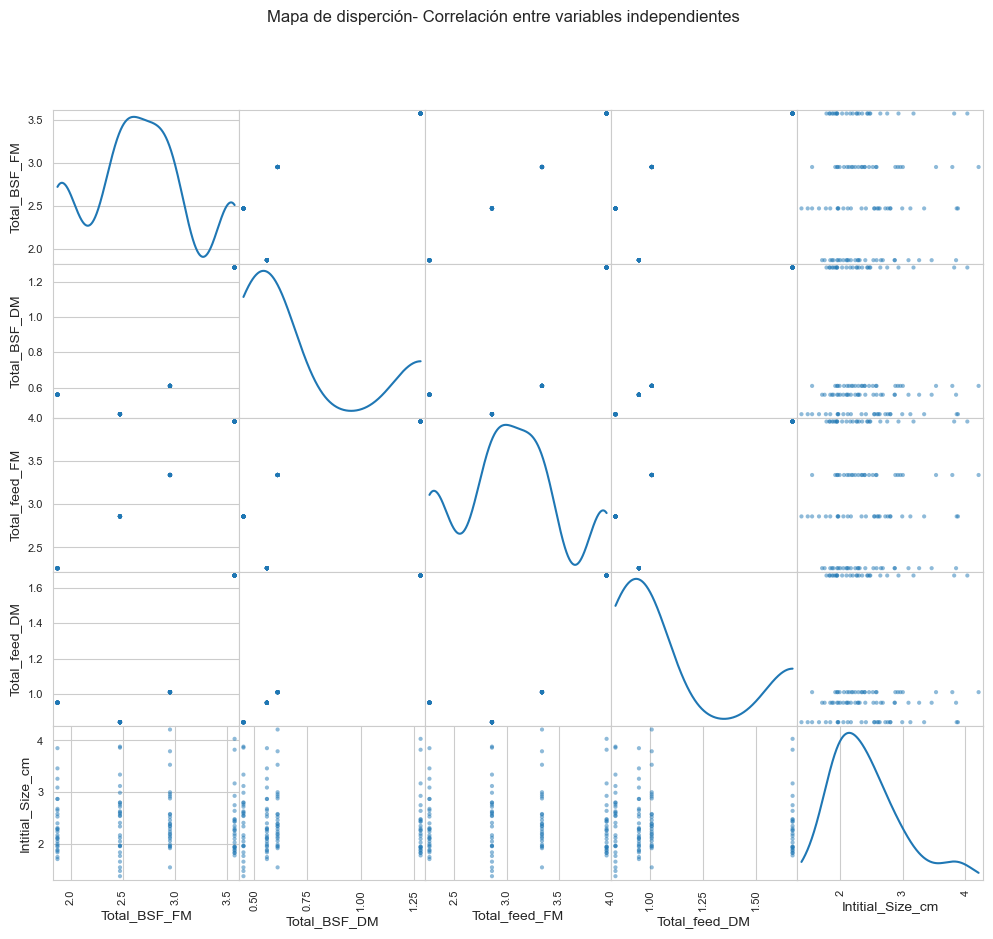

In [43]:
scatter_matrix(data_filtrado[variables_independientes], figsize=(12, 10), diagonal='kde')
plt.suptitle('Mapa de disperción- Correlación entre variables independientes')  # diag_kind='hist' para histogramas
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17856\1073226230.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
C:\Users\HP\AppData\Local\Temp\ipykernel_17856\1073226230.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


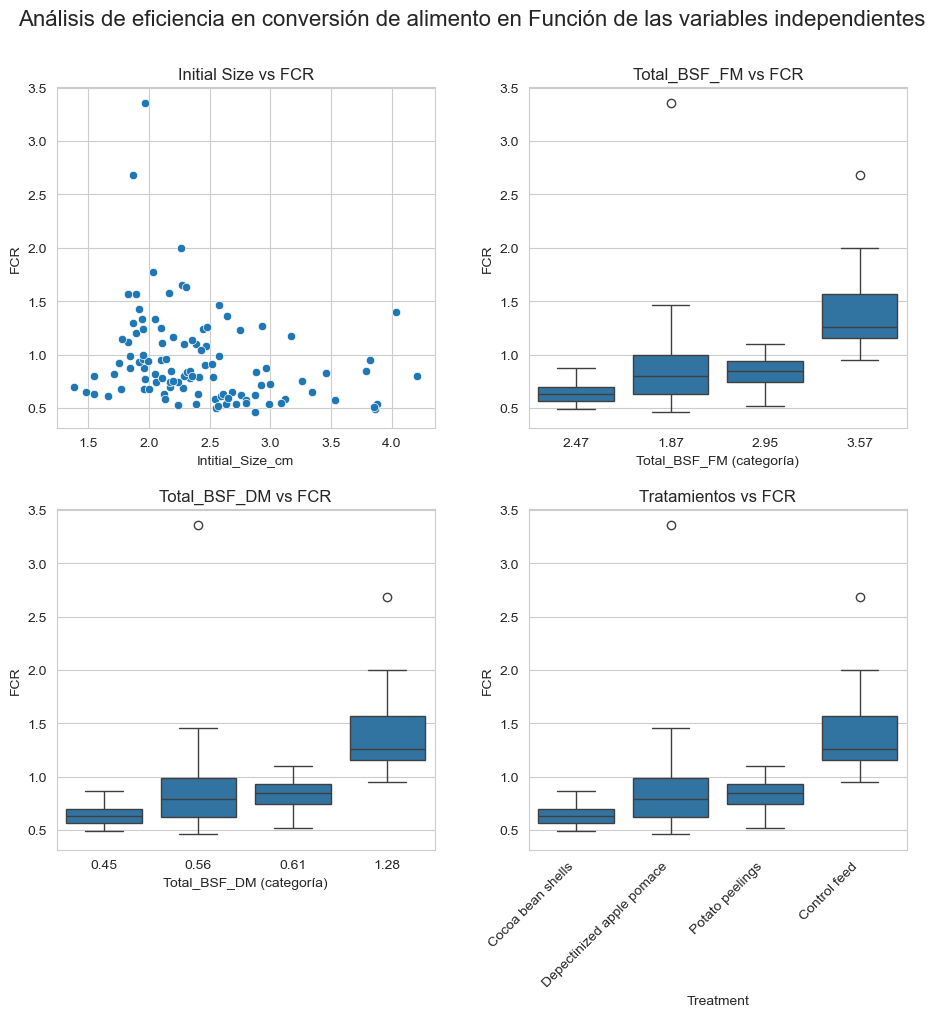

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
plt.tight_layout(pad=4.0)

# Variable continua: scatter
sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='FCR', ax=axs[0, 0])
axs[0, 0].set_title('Initial Size vs FCR')

# Variables discretas: convertirlas a categorías
for col, ax in zip(['Total_BSF_FM', 'Total_BSF_DM'], [axs[0,1], axs[1,0]]):
    sns.boxplot(x=data_filtrado[col].astype(str), y=data_filtrado['FCR'], ax=ax)
    ax.set_title(f'{col} vs FCR')
    ax.set_xlabel(col + ' (categoría)')

# Tratamientos (variables 0/1) -> agrupar
sns.boxplot(x=data_filtrado['Treatment'], y=data_filtrado['FCR'], ax=axs[1,1])
axs[1,1].set_title('Tratamientos vs FCR')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


# Si queda un subplot vacío
fig.suptitle('Análisis de eficiencia en conversión de alimento en Función de las variables independientes',
             fontsize=16, y=1.02)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17856\323099142.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
C:\Users\HP\AppData\Local\Temp\ipykernel_17856\323099142.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


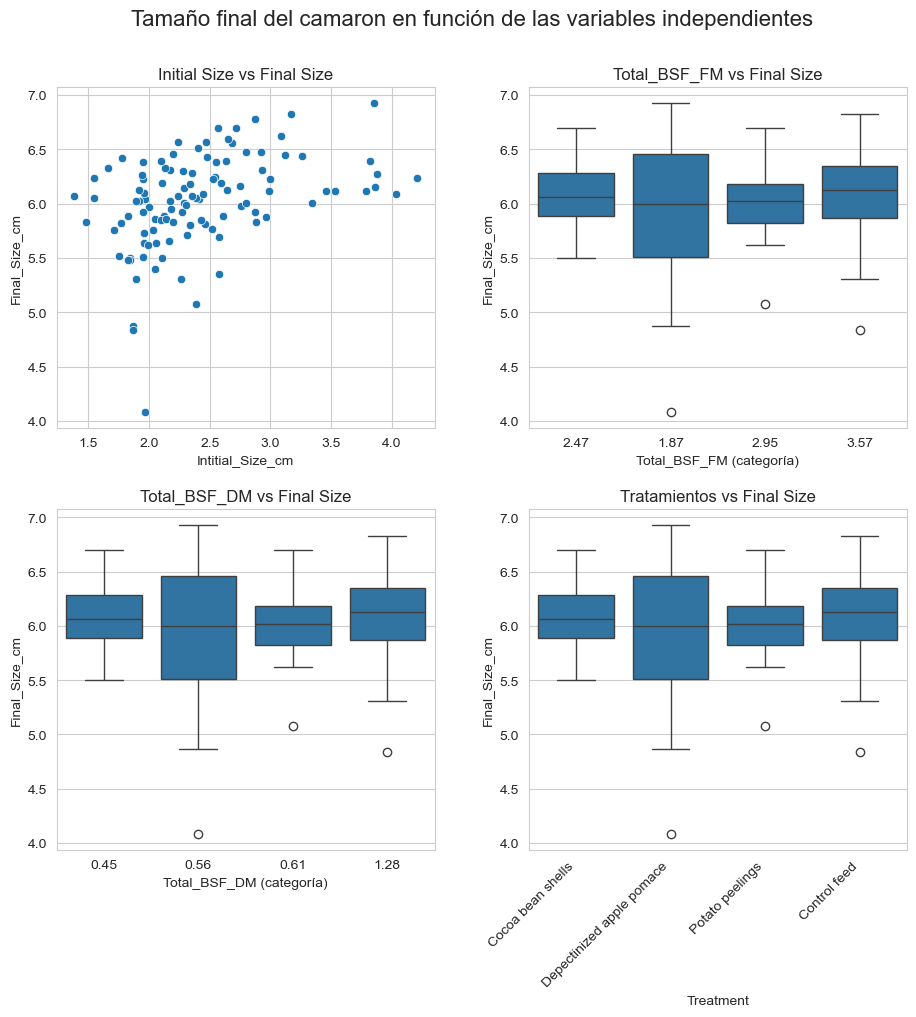

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
plt.tight_layout(pad=4.0)

# Variable continua: scatter
sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='Final_Size_cm', ax=axs[0, 0])
axs[0, 0].set_title('Initial Size vs Final Size')


# Variables discretas: convertirlas a categorías
for col, ax in zip(['Total_BSF_FM', 'Total_BSF_DM'], [axs[0,1], axs[1,0]]):
    sns.boxplot(x=data_filtrado[col].astype(str), y=data_filtrado['Final_Size_cm'], ax=ax)
    ax.set_title(f'{col} vs Final Size')
    ax.set_xlabel(col + ' (categoría)')

# Tratamientos (variables 0/1) -> agrupar
sns.boxplot(x=data_filtrado['Treatment'], y=data_filtrado['Final_Size_cm'], ax=axs[1,1])
axs[1,1].set_title('Tratamientos vs Final Size')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


# Si queda un subplot vacío
fig.suptitle('Tamaño final del camaron en función de las variables independientes',
             fontsize=16, y=1.02)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17856\1434450640.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)
C:\Users\HP\AppData\Local\Temp\ipykernel_17856\1434450640.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


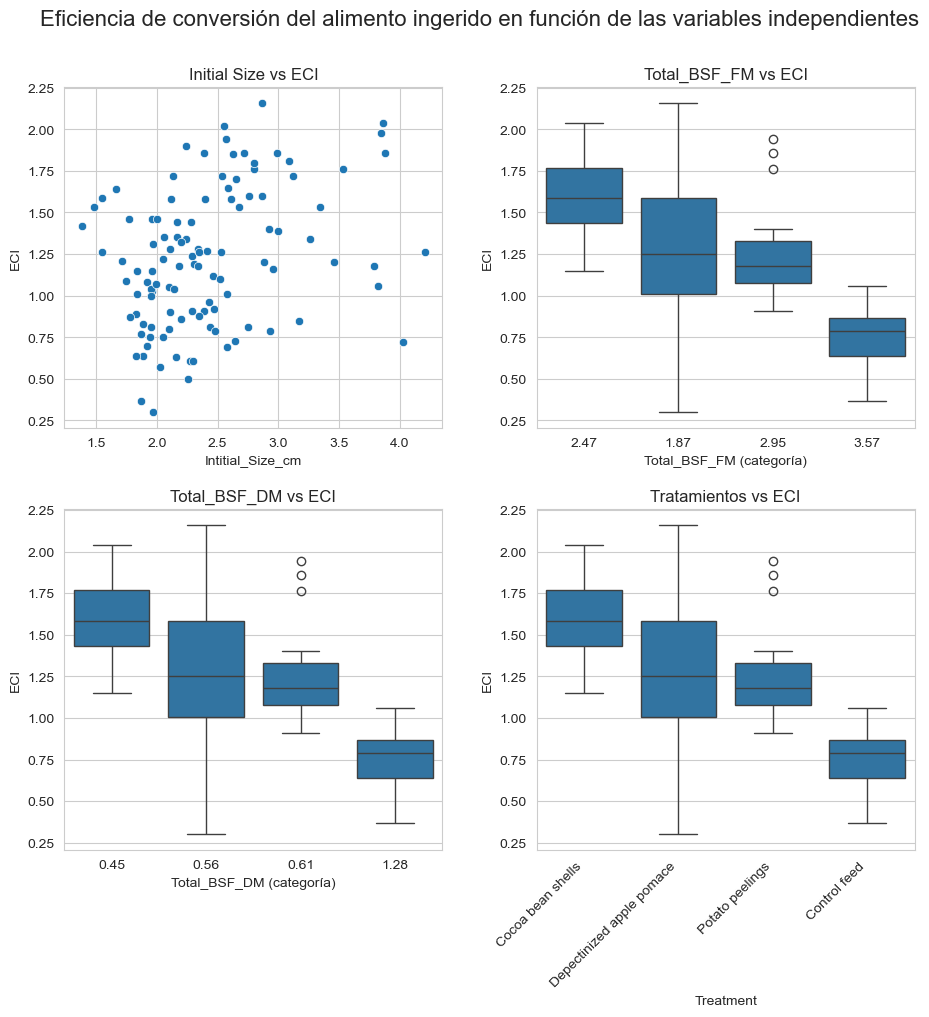

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
plt.tight_layout(pad=4.0)

# Variable continua: scatter
sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='ECI', ax=axs[0, 0])
axs[0, 0].set_title('Initial Size vs ECI')


# Variables discretas: convertirlas a categorías
for col, ax in zip(['Total_BSF_FM', 'Total_BSF_DM'], [axs[0,1], axs[1,0]]):
    sns.boxplot(x=data_filtrado[col].astype(str), y=data_filtrado['ECI'], ax=ax)
    ax.set_title(f'{col} vs ECI')
    ax.set_xlabel(col + ' (categoría)')

# Tratamientos (variables 0/1) -> agrupar
sns.boxplot(x=data_filtrado['Treatment'], y=data_filtrado['ECI'], ax=axs[1,1])
axs[1,1].set_title('Tratamientos vs ECI')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, ha='right')


# Si queda un subplot vacío
fig.suptitle('Eficiencia de conversión del alimento ingerido en función de las variables independientes',
             fontsize=16, y=1.02)
plt.show()

In [ ]:
variables_respuesta

['Weight_gain_(WG)_%', 'FCR', 'ECI', 'Final_Size_cm']

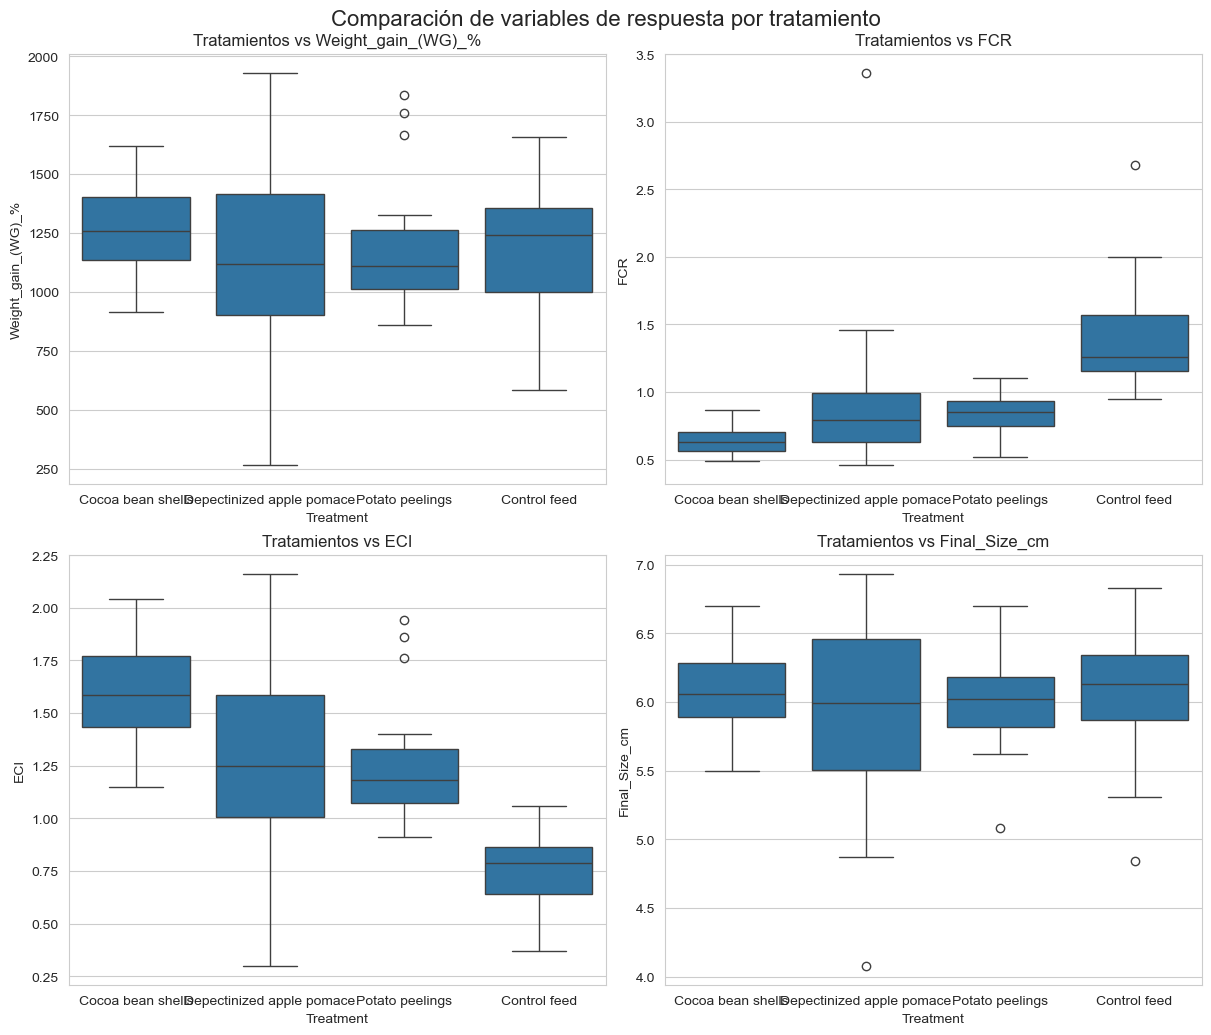

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)


# Aplanamos axs para iterar más fácil
axs = axs.flatten()

for col, ax in zip(variables_respuesta, axs):
    sns.boxplot(x=data_filtrado['Treatment'], y=data_filtrado[col], ax=ax)
    ax.set_title(f'Tratamientos vs {col}')

# Título general
fig.suptitle('Comparación de variables de respuesta por tratamiento', fontsize=16, y=1.02)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17856\1744871781.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0)


Text(0.5, 1.0, 'Initial Size vs Final Size')

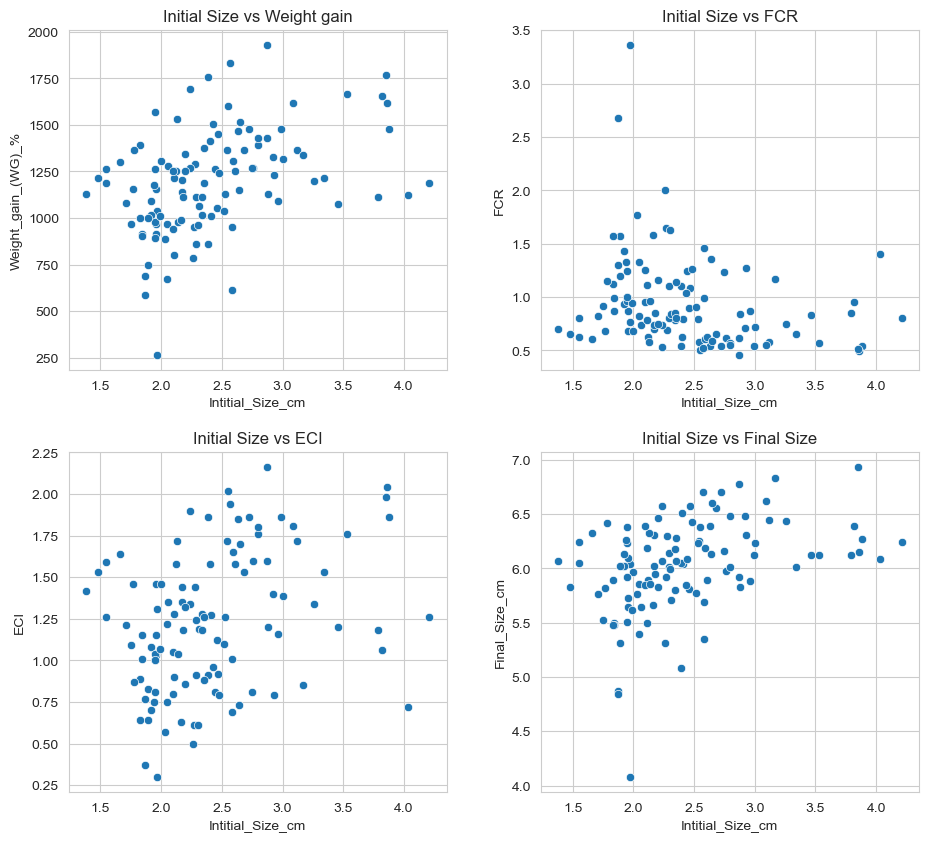

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
plt.tight_layout(pad=4.0)
sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='Weight_gain_(WG)_%', ax=axs[0, 0])
axs[0, 0].set_title('Initial Size vs Weight gain')

sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='FCR', ax=axs[0, 1])
axs[0, 1].set_title('Initial Size vs FCR')

sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='ECI', ax=axs[1, 0])
axs[1, 0].set_title('Initial Size vs ECI')

sns.scatterplot(data=data_filtrado, x='Intitial_Size_cm', y='Final_Size_cm', ax=axs[1, 1])
axs[1, 1].set_title('Initial Size vs Final Size')

In [50]:
df = data_filtrado

In [51]:
cocoa = df[df['Treatment'] == 'Cocoa bean shells']
apple = df[df['Treatment'] == 'Depectinized apple pomace']
potato = df[df['Treatment'] == 'Potato peelings']
control = df[df['Treatment'] == 'Control feed']

In [55]:
from scipy.stats import f_oneway

alpha = 0.05  # nivel de significancia

for variable in variables_respuesta:
    f_stat, p_valor = f_oneway(cocoa[variable], apple[variable], potato[variable], control[variable])
    print(f"\nVariable: {variable}")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_valor:.4g}")
    
    if p_valor < alpha:
        print("Resultado: Se rechaza la hipótesis nula. Hay diferencias significativas entre al menos dos grupos.")
    else:
        print("Resultado: No se rechaza la hipótesis nula. No hay diferencias significativas entre los grupos.")


Variable: Weight_gain_(WG)_%
F-statistic: 0.7356, p-value: 0.533
Resultado: No se rechaza la hipótesis nula. No hay diferencias significativas entre los grupos.

Variable: FCR
F-statistic: 22.8386, p-value: 1.757e-11
Resultado: Se rechaza la hipótesis nula. Hay diferencias significativas entre al menos dos grupos.

Variable: ECI
F-statistic: 36.8843, p-value: 2.095e-16
Resultado: Se rechaza la hipótesis nula. Hay diferencias significativas entre al menos dos grupos.

Variable: Final_Size_cm
F-statistic: 0.6828, p-value: 0.5645
Resultado: No se rechaza la hipótesis nula. No hay diferencias significativas entre los grupos.


In [57]:
df.groupby('Treatment')[['FCR', 'ECI']].mean().sort_values('ECI', ascending=False)

,FCR,ECI
Treatment,,
Cocoa bean shells,0.647143,1.583929
Depectinized apple pomace,0.917143,1.287857
Potato peelings,0.832963,1.245556
Control feed,1.380370,0.761852


### Conclusión prueba de hipotesis
Aunque ninguno de los tratamientos produjo un aumento significativo en la masa o el tamaño, sí se observaron efectos en el índice de conversión alimenticia (FCR) y en la eficiencia de conversión del alimento ingerido (ECI), en comparación con el grupo control. El tratamiento con cocoa bean shells mostró el mejor FCR (valores más bajos = mayor eficiencia) y también el mayor ECI, superando al resto de los tratamientos.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total_BSF_FM                         110 non-null    float64
 1   Total_BSF_DM                         110 non-null    float64
 2   Total_feed_FM                        110 non-null    float64
 3   Total_feed_DM                        110 non-null    float64
 4   Weight_gain_(WG)_%                   110 non-null    float64
 5   SGR                                  110 non-null    float64
 6   FCR                                  110 non-null    float64
 7   ECI                                  110 non-null    float64
 8   Intitial_Size_cm                     110 non-null    float64
 9   Final_Size_cm                        110 non-null    float64
 10  Treatment_Control feed               110 non-null    int64  
 11  Treatment_Depectinized apple pomace  

In [ ]:
dummies = pd.get_dummies(
    data['Treatment'],
    prefix='Treatment',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )
data = pd.concat([data, dummies], axis=1)
tratamientos = data['Treatment']
data.drop('Treatment', axis=1, inplace=True)
data.head()

data.columns

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([False, False,  True, False,  True,  True,  True,  True])

In [ ]:
import statsmodels.api as sm

In [ ]:
logi_model = sm.Logit(y, x_final)
result = logi_model.fit()

In [ ]:
result.summary()